# EDA of EWS

In [1]:
# read dataframe
import pandas as pd
df = pd.read_csv('../data/2_EWS_en/EWS_data_en.csv')

In [2]:
# temporal preprocessing of reason
import numpy as np
reason_dict = {
    # sales prices
    '単価の動き': 'Trends in Sales Price', 
    '受注単価や販売単価の動き': 'Trends in Sales Price', 
    '受注価格や販売': 'Trends in Sales Price',
    '受注価格や販売価格': 'Trends in Sales Price', 
    '受注価格や販売価格の動き': 'Trends in Sales Price', 
    # sales volume
    '販売量の動き': 'Trends in Sales Volume', 
    '受注量や販売量': 'Trends in Sales Volume', 
    '受注量や販売量の動き': 'Trends in Sales Volume',
    # customers
    '客の様子': 'Customer Behavior', 
    'お客様の様子': 'Customer Behavior', 
    'お客様の動き': 'Customer Behavior', 
    '来客数の動き': 'Trends in Customer Visits', 
    # client
    '取引先の様子': 'Client Situation', 
    '取引先の動き': 'Client Situation',
    # comptetior
    '競争相手の様子': 'Competitor Situation', 
    '競争相手の動き': 'Competitor Situation', 
    # surrounding companies
    '周辺企業の様子': 'Surrounding Companies Situation', 
    # employment
    '求人数の動き': 'Trends in Job Openings', 
    '求人数の動き求人数の動き': 'Trends in Job Openings', 
    '求職者数の動き': 'Trends in Job Seekers',  
    '採用者数の動き': 'Trends in Employment Numbers', 
    '雇用形態の様子': 'Trends in Employment Forms',
    # miscellaneous
    'それ以外': 'Others', 
    'その他': 'Others', 
    '＊': 'No significant responses available', 
    '－': 'No response available',
    '・製造業、サービス業等を問わ': np.nan # error value
}
df['Reason for Judgment'] = df['Reason for Judgment'].replace(reason_dict)

In [3]:
# temporal preprocessing of reason
df['Details'] = df['Details'].str.lstrip('・∙.')

In [4]:
df.head()

,Year,Month,Region,Topic,Economic Judgment,Sector/Occupation,Reason for Judgment,Details
0,2000,1,Hokkaido,Household Activity,Excellent,No response available,No response available,NaN
1,2000,1,Hokkaido,Household Activity,Good,"Shopping street representatives, etc.",NaN,The number of items sold is increasing due to ...
2,2000,1,Hokkaido,Household Activity,Good,Restaurant (upscale) staff,NaN,"Compared to two to three months ago, sales are..."
3,2000,1,Hokkaido,Household Activity,Unchanged,Department store sales floor manager/person in...,NaN,"As was the case three months ago, customers ar..."
4,2000,1,Hokkaido,Household Activity,Unchanged,Supermarket managers and clerks,NaN,"The economy is not good this month, partly bec..."


## Remove missing values

In [5]:
df = df.dropna()

## Extract a specific period of time

In [6]:
# Create a new column representing year and month in 'YYYY-MM' format
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

start_month = '2005-07'
end_month = '2021-10'
df = df[(start_month<=df['YearMonth'])&(df['YearMonth']<=end_month)]
df = df.reset_index(drop=True)

column_order = ['YearMonth'] + [col for col in df.columns if (col != 'YearMonth') & (col != 'Year') & (col != 'Month')]
df = df[column_order]

df.head()

,YearMonth,Region,Topic,Economic Judgment,Sector/Occupation,Reason for Judgment,Details
0,2005-07,Hokkaido,Household Activity,Excellent,No significant responses available,No significant responses available,No significant responses available
1,2005-07,Hokkaido,Household Activity,Good,Shopping street (representative),Trends in Customer Visits,The variety of events held throughout the city...
2,2005-07,Hokkaido,Household Activity,Good,Shopping street (representative),Customer Behavior,"Although there were bargains in July, even aft..."
3,2005-07,Hokkaido,Household Activity,Good,General retailer [alcoholic beverages] (manager),Trends in Sales Volume,"The weather was very good until mid-July, and ..."
4,2005-07,Hokkaido,Household Activity,Good,General retail store [souvenirs] (clerk),Trends in Customer Visits,"For the past three months, the number of passe..."


## Static Descrption

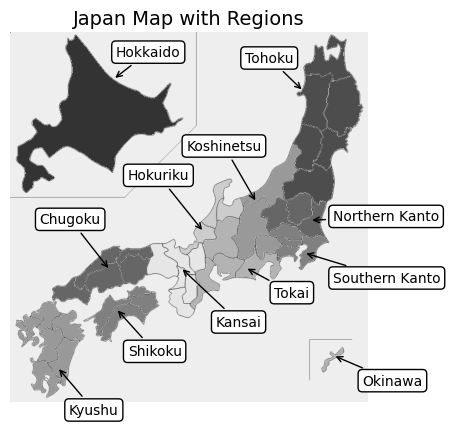

In [7]:
from japanmap import picture, get_data, pref_map
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import os

# Define the mapping of regions to prefecture numbers
region_dict = {
    'Hokkaido': [1],
    'Tohoku': [2, 3, 4, 5, 6, 7],
    'Northern Kanto': [8, 9, 10],
    'Southern Kanto': [11, 12, 13, 14],
    'Koshinetsu': [15, 19, 20],
    'Tokai': [21, 22, 23, 24],
    'Hokuriku': [16, 17, 18],
    'Kansai': [25, 26, 27, 28, 29, 30],
    'Chugoku': [31, 32, 33, 34, 35],
    'Shikoku': [36, 37, 38, 39],
    'Kyushu': [40, 41, 42, 43, 44, 45, 46],
    'Okinawa': [47],
}

# Define grayscale levels as RGB values for each region
region_grayscale = {
    'Hokkaido': (51, 51, 51),
    'Tohoku': (77, 77, 77),
    'Northern Kanto': (102, 102, 102),
    'Southern Kanto': (128, 128, 128),
    'Koshinetsu': (153, 153, 153),
    'Tokai': (179, 179, 179),
    'Hokuriku': (204, 204, 204),
    'Kansai': (230, 230, 230),
    'Chugoku': (102, 102, 102),
    'Shikoku': (128, 128, 128),
    'Kyushu': (153, 153, 153),
    'Okinawa': (179, 179, 179),
}

# Create a dictionary mapping prefecture IDs to grayscale RGB values
fill_dict = {pref: region_grayscale[region] for region, prefs in region_dict.items() for pref in prefs}

# Generate the grayscale map
pct = picture(fill_dict)  # Create the grayscale map as a numpy array
plt.imshow(pct)  # Display the map
plt.title('Japan Map with Regions', fontsize=14)
plt.axis('off')  # Hide axes

# Define label positions for each region
label_positions = {
    'Hokkaido': (180, 40),
    'Tohoku': (400, 50),
    'Northern Kanto': (550, 320),
    'Southern Kanto': (550, 425),
    'Koshinetsu': (300, 200),
    'Tokai': (450, 450),
    'Hokuriku': (200, 250),
    'Kansai': (350, 500),
    'Chugoku': (50, 325),
    'Shikoku': (200, 550),
    'Kyushu': (100, 650),
    'Okinawa': (600, 600),
}

# Add labels with arrows pointing to regions
for region, (x, y) in label_positions.items():
    if region=='Hokkaido':
        plt.annotate(region, xy=(x-5, y+40), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Tohoku':
        plt.annotate(region, xy=(x+100, y+50), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Northern Kanto':
        plt.annotate(region, xy=(x-40, y), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Koshinetsu':
        plt.annotate(region, xy=(x+120, y+90), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Hokuriku':
        plt.annotate(region, xy=(x+130, y+90), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Kansai':
        plt.annotate(region, xy=(x-60, y-100), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Chugoku':
        plt.annotate(region, xy=(x+120, y+80), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Shikoku':
        plt.annotate(region, xy=(x-20, y-80), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    elif region=='Kyushu':
        plt.annotate(region, xy=(x-20, y-80), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))
    else:
        plt.annotate(region, xy=(x-50, y-50), xytext=(x, y), fontsize=10,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
                 arrowprops=dict(arrowstyle='->', color='black'))

# Create save directory
save_dir = '../results/5_EWS_EDA'
os.makedirs(save_dir, exist_ok=True)

# Define file paths using relative paths
file_path = os.path.join(save_dir, 'japan_map.png')

# Save file 
plt.savefig(file_path, dpi=300, bbox_inches='tight')

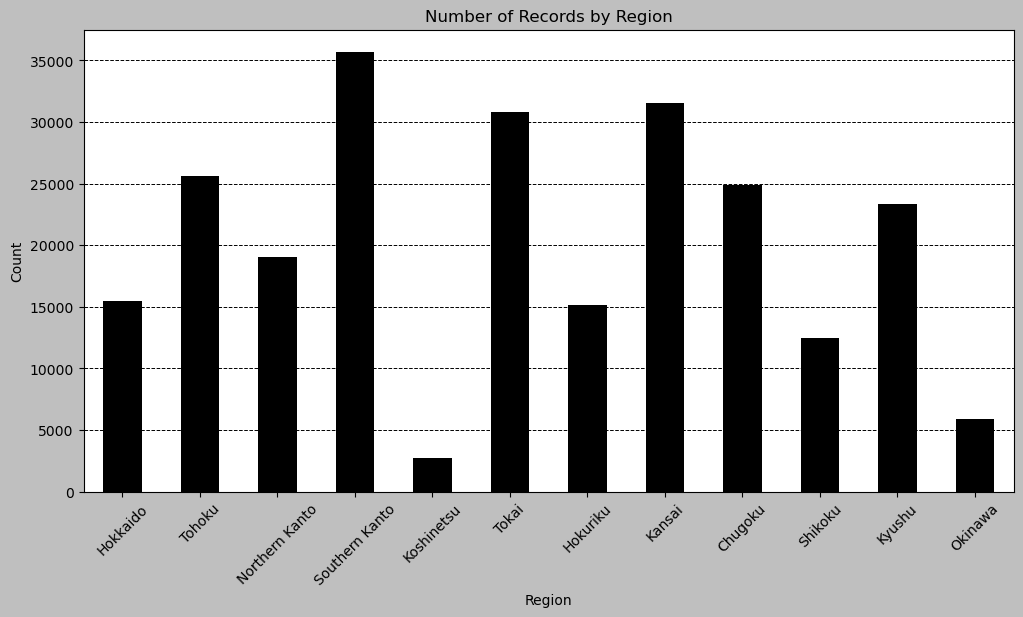

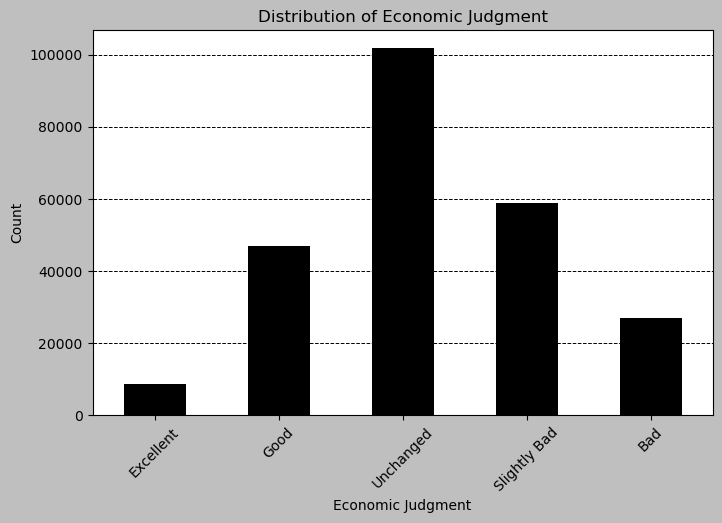

In [8]:
# Correct the region order
region_order = ['Hokkaido', 'Tohoku', 'Northern Kanto', 'Southern Kanto', 'Koshinetsu', 
                'Tokai', 'Hokuriku', 'Kansai', 'Chugoku', 'Shikoku', 'Kyushu', 'Okinawa']

# Define the custom order for Economic Judgment
economic_judgment_order = ['Excellent', 'Good', 'Unchanged', 'Slightly Bad', 'Bad']

# Set grayscale style
plt.style.use('grayscale')

# Plot the number of records by region in grayscale with corrected region order
plt.figure(figsize=(12, 6))
df['Region'].value_counts().reindex(region_order).plot(kind='bar', color='black')
plt.title('Number of Records by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.savefig(os.path.join(save_dir, 'n_recods_by_region.png'), dpi=300, bbox_inches='tight')

# Plot the distribution of economic judgment categories in grayscale with custom order
plt.figure(figsize=(8, 5))
df['Economic Judgment'].value_counts().reindex(economic_judgment_order).plot(kind='bar', color='black')
plt.title('Distribution of Economic Judgment')
plt.xlabel('Economic Judgment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.savefig(os.path.join(save_dir, 'dist_of_economic_judgment.png'), dpi=300, bbox_inches='tight')

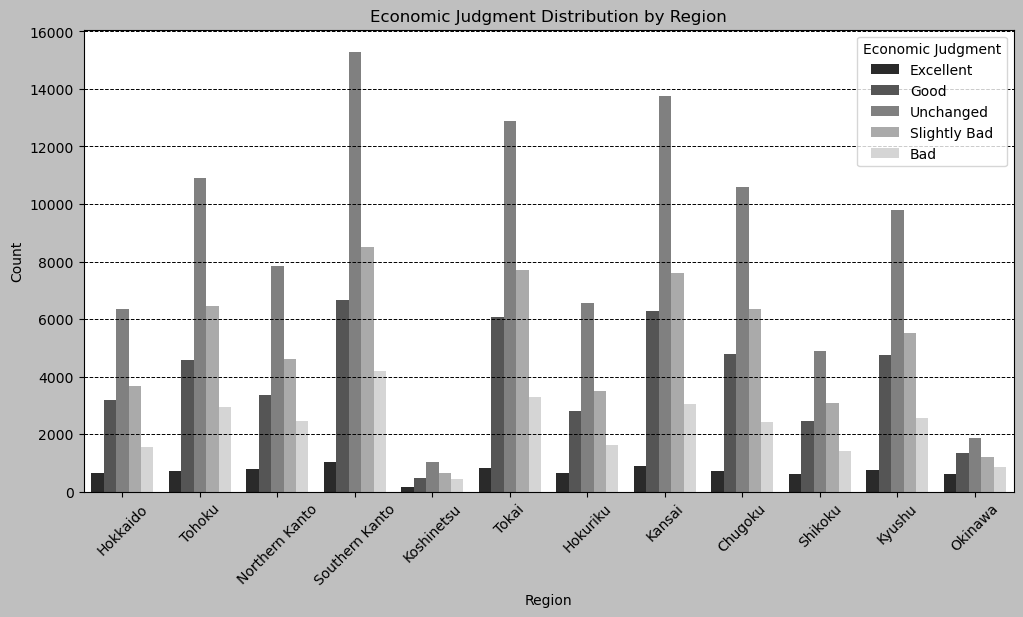

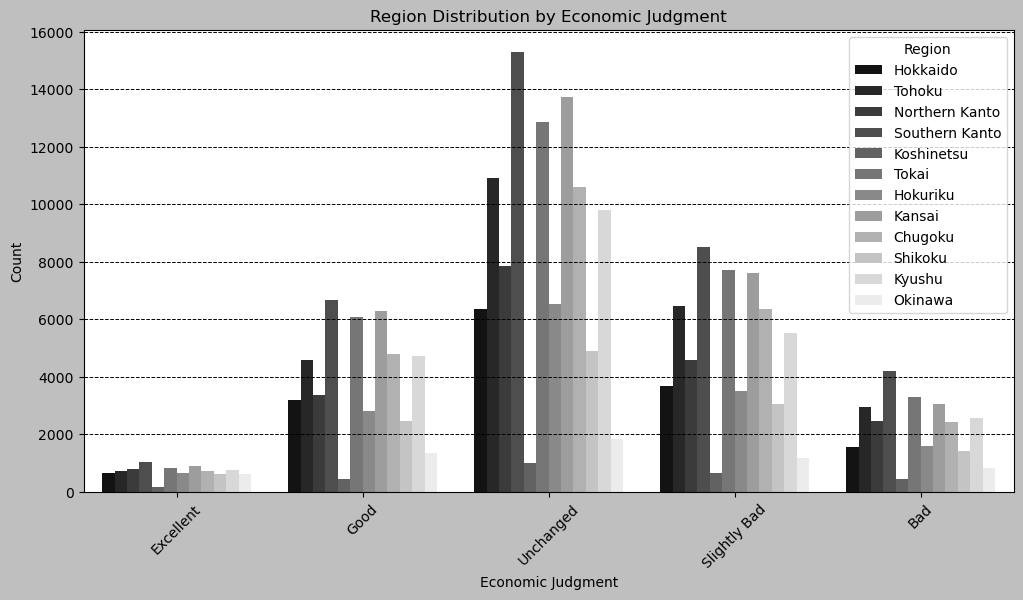

In [9]:
import seaborn as sns

# Plot Economic Judgment distribution by Region with custom order
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Economic Judgment', palette='gray', order=region_order)
plt.title('Economic Judgment Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Economic Judgment')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.savefig(os.path.join(save_dir, 'dist_of_economic_judgment_by_region.png'), dpi=300, bbox_inches='tight')

# Plot Region distribution by Economic Judgment with custom order
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Economic Judgment', hue='Region', palette='gray', hue_order=region_order)
plt.title('Region Distribution by Economic Judgment')
plt.xlabel('Economic Judgment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.savefig(os.path.join(save_dir, 'region_dist_by_economic_judgment.png'), dpi=300, bbox_inches='tight')

## Dynamic Description

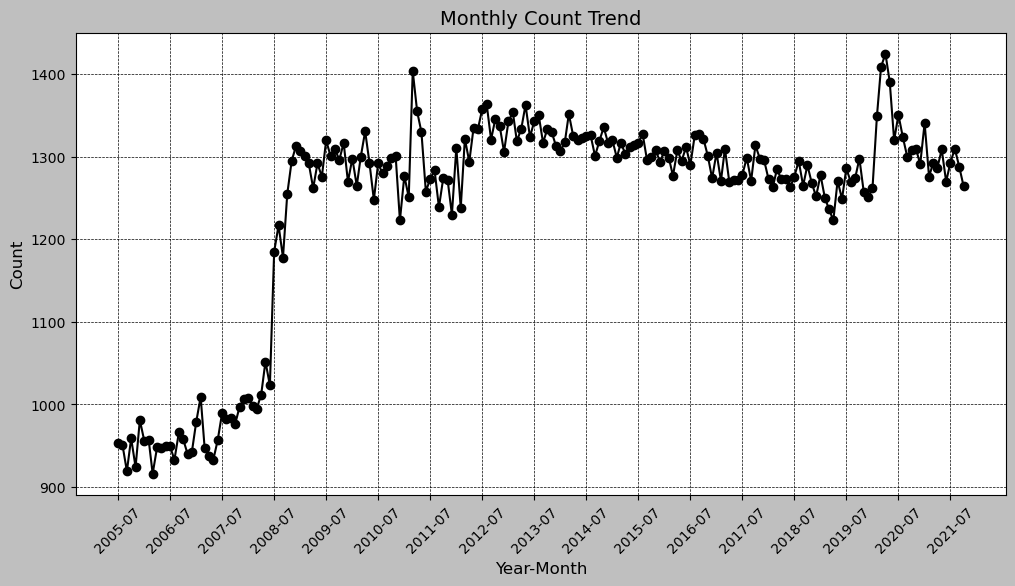

In [12]:
# Assume df contains 'YearMonth' column
# Convert 'YearMonth' to datetime format
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

# Aggregate data by YearMonth
df_count = df['YearMonth'].value_counts().sort_index()

# Plot YearMonth trend
plt.figure(figsize=(12, 6))
plt.plot(df_count.index, df_count.values, marker='o', linestyle='-', color='black')
plt.title('Monthly Count Trend', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(df_count.index[::12], df_count.index[::12].strftime('%Y-%m'), rotation=45)  # Show labels every year in YYYY-MM format
plt.grid(True, linestyle='--', linewidth=0.5)

# Create save directory
save_dir = 'results/5_EWS_EDA'
os.makedirs(save_dir, exist_ok=True)

# Define file path
file_path = os.path.join(save_dir, 'yearmonth_trend.png')

# Save the plot
plt.savefig(file_path, dpi=300, bbox_inches='tight')